# Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Importing Data

In [3]:
# Save to df
data = pd.read_csv('spaceship-titanic/train.csv')

# Shape
print('Data shape:', data.shape)

Data shape: (8693, 14)


Now let's understand the data

In [4]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Let's focus on the properties of the numerical features

In [5]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Understanding Features

In [6]:
#print the name of the numerical features
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Here we create 2 lists with the name of categorical features and numerical features

In [7]:
num_features = []
cat_features = []
for i,f in enumerate(data.keys()):
    if data.dtypes[i] == 'float64':
        num_features.append(f)
    else:
        cat_features.append(f)


In [8]:
num_features

['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [9]:
cat_features

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']

## Numerical Features

Age - The age of the passenger.

<Axes: xlabel='Age', ylabel='Count'>

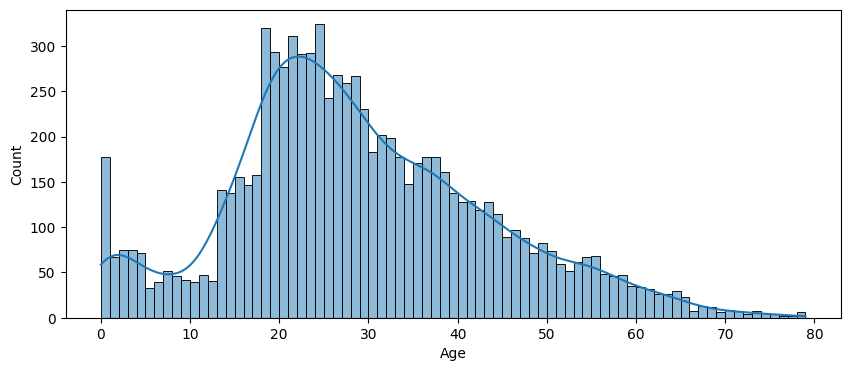

In [10]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Age', binwidth=1, kde=True)

RoomService: The amount of money that tha passenger spent for RoomService  

<Axes: xlabel='RoomService', ylabel='Count'>

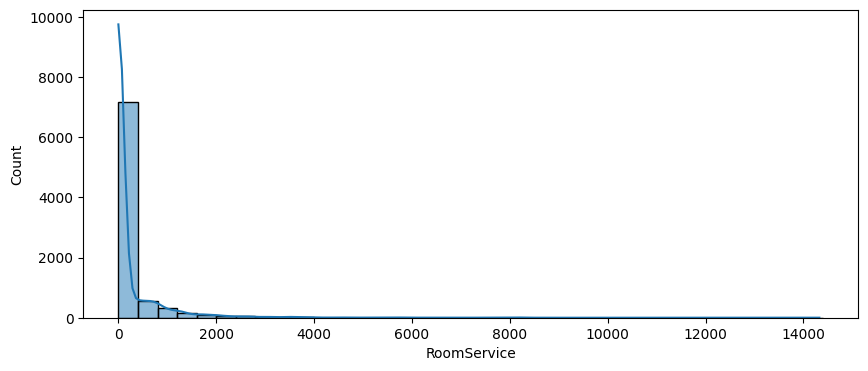

In [11]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='RoomService', binwidth=400, kde=True)

FoodCourt: The amount of money that tha passenger spent for FoodCourt  

<Axes: xlabel='FoodCourt', ylabel='Count'>

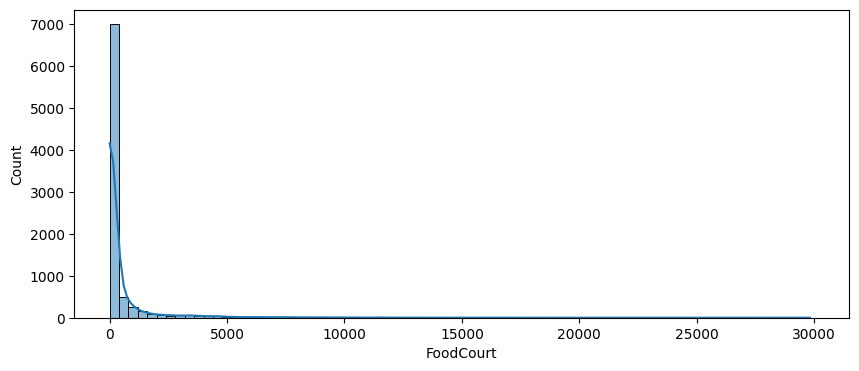

In [12]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='FoodCourt', binwidth=400, kde=True)

ShoppingMall: The amount of money that tha passenger spent for ShoppingMall  

<Axes: xlabel='ShoppingMall', ylabel='Count'>

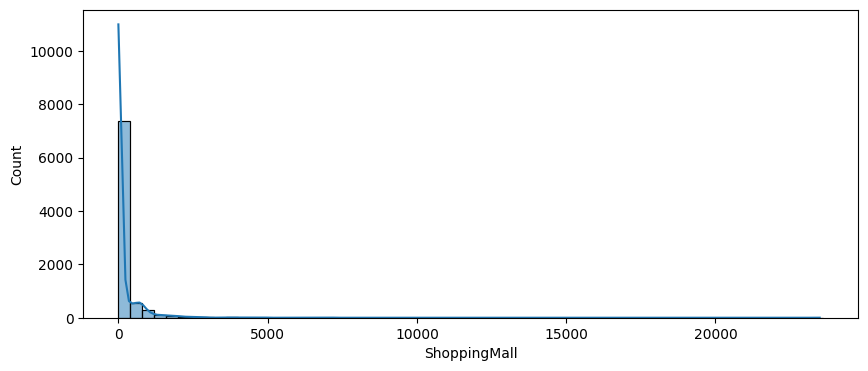

In [13]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='ShoppingMall', binwidth=400, kde=True)

Spa: The amount of money that tha passenger spent for Spa  

<Axes: xlabel='Spa', ylabel='Count'>

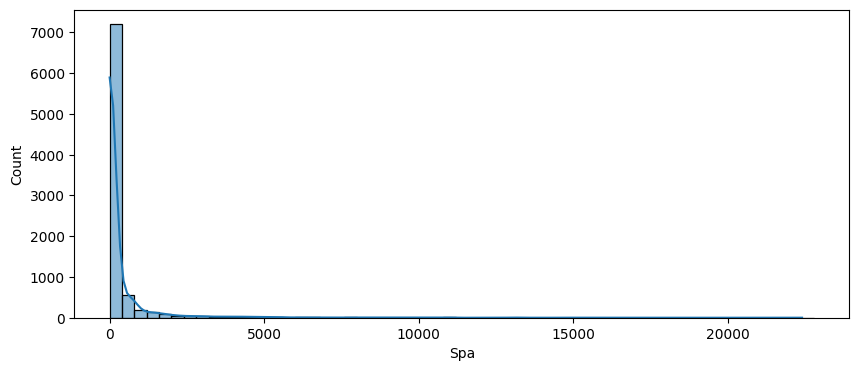

In [14]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='Spa', binwidth=400, kde=True)

VRDeck: The amount of money that tha passenger spent for VRDeck  

<Axes: xlabel='VRDeck', ylabel='Count'>

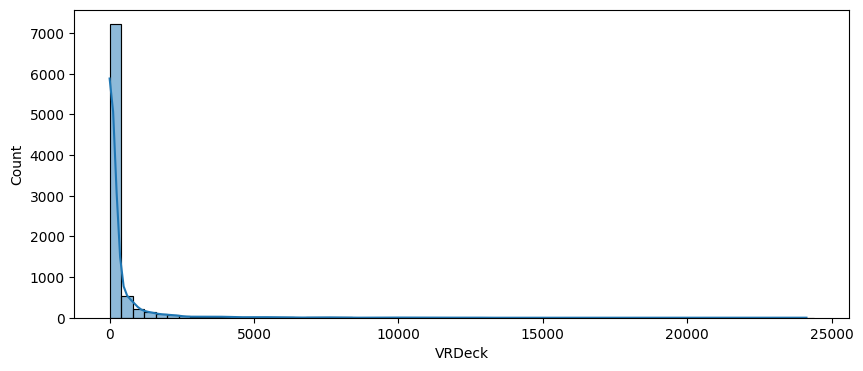

In [15]:
plt.figure(figsize = (10,4))

#plot using seaborn
sns.histplot(data=data, x='VRDeck', binwidth=400, kde=True)

As we can clearly see, those features have the same distribution. 
From those plots we cannot say that the same group of people has spent the money in all the categories, but for the porpouse of this analysis we just care about the fact that those people have spent money.

to verify that we try to clusterize those features and see if there are results

In [16]:
services_features =['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [17]:
services = data[services_features]
services.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


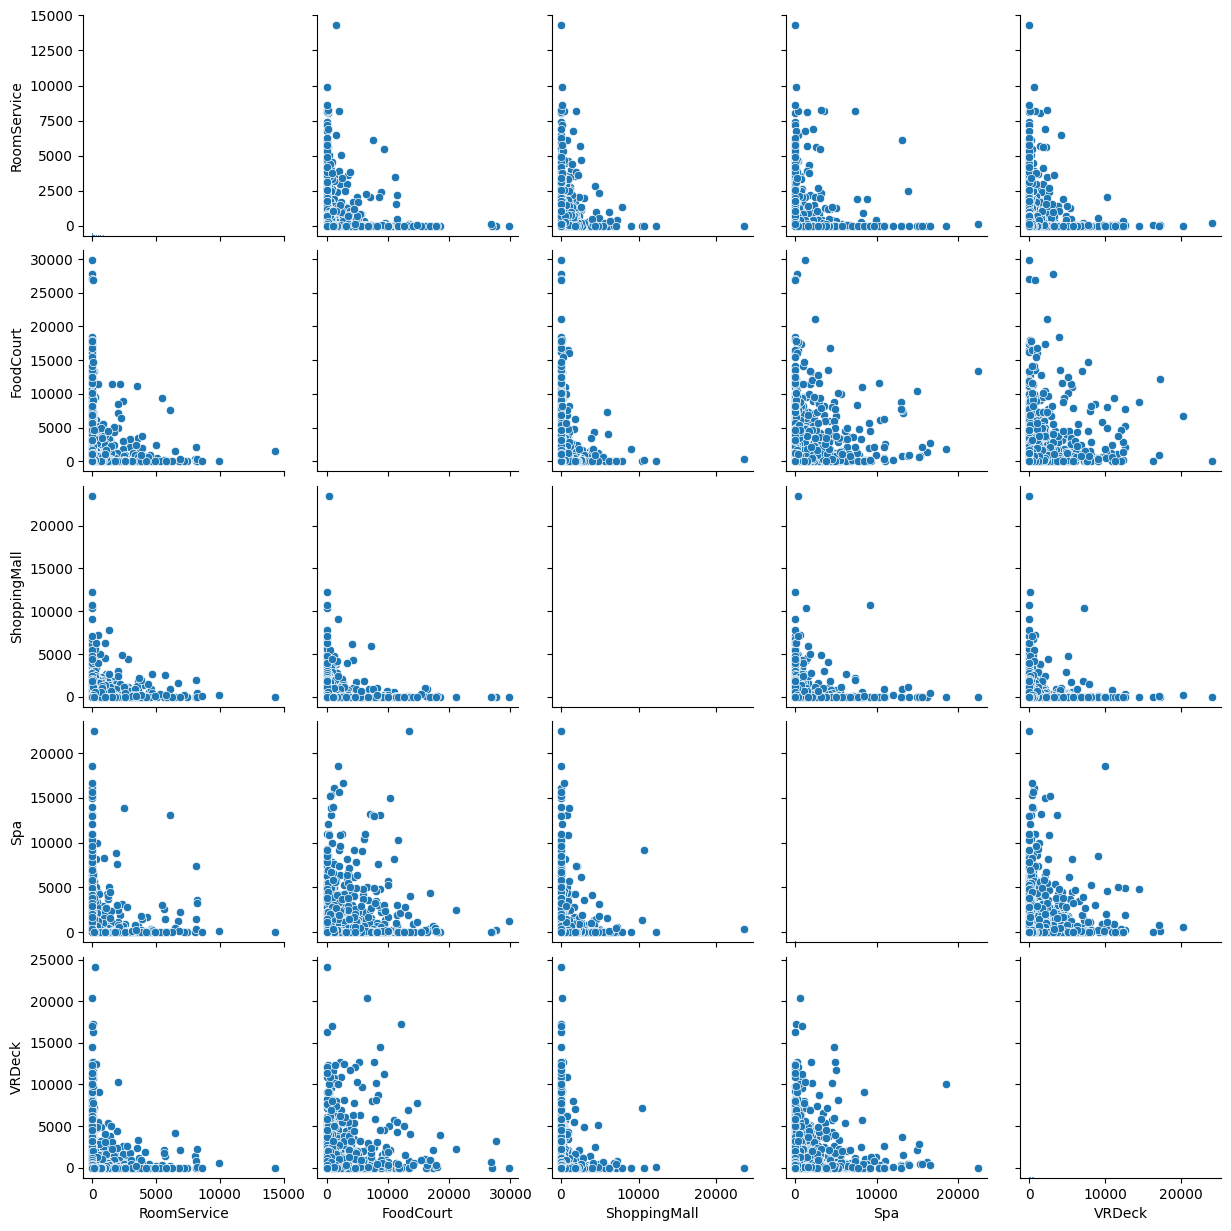

In [18]:
sns.pairplot(data=services)

## Categorical Features

In [19]:
cat_features


['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name',
 'Transported']

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

* **Name** - The first and last names of the passenger.

PassengerID

In [20]:
np.linspace(0.5,7.5,8)

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])

[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 4, 5, 6, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1, 2, 3, 1, 1, 1, 2, 3, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 4, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 

Text(0.5, 1.0, 'Group distribution')

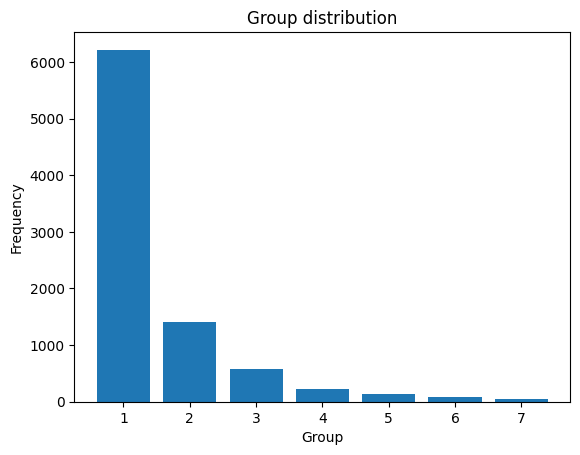

In [21]:
#separate the gruop and the id in the group
gruop, id_group = [],[]
for pID in data['PassengerId']:
    gruop.append(int(pID[0:4]))
    id_group.append(int(pID[5:7]))

fres, bins = np.histogram(id_group, np.linspace(0.5,7.5,8))
bins = [1,2,3,4,5,6,7]
print(id_group)
plt.bar(bins,fres)
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.title('Group distribution')

<Figure size 1000x400 with 0 Axes>

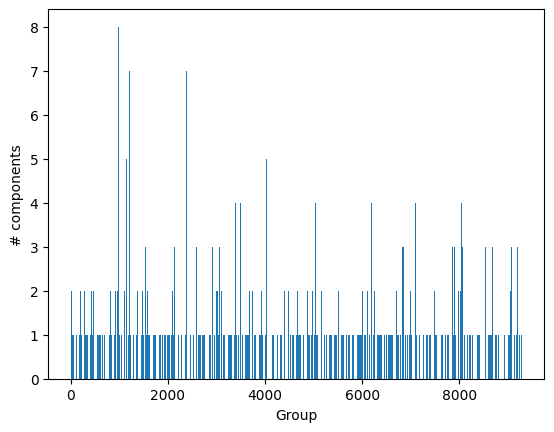

<Figure size 1000x400 with 0 Axes>

In [22]:
unique, counts = np.unique(gruop, return_counts=True)
plt.bar(unique,counts)
plt.xlabel('Group')
plt.ylabel('# components')

plt.figure(figsize = (10,4))


Cabin

* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [23]:
data['Cabin']

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [24]:
type(data["Cabin"][15])

float

In [25]:
trys = 'E/608/S'
trys = trys.split('/')
trys

['E', '608', 'S']

In [36]:
cabin_dict = {
    'Deck': [],
    'Num': [],
    'Side': []
}
for c in data["Cabin"]:
    #split c by /
    if type(c) == float:
        continue
    c = c.split('/')
    for i,let in enumerate('ABCDEFGT'):
        if c[0] == let:
            cabin_dict['Deck'].append(i)

    # cabin_dict['Deck'].append(c[0])
    cabin_dict['Num'].append(int(c[1]))

    for i,let in enumerate('SP'):
        if c[2] == let:
            cabin_dict['Side'].append(i)

print(cabin_dict)

{'Deck': [1, 5, 0, 0, 5, 5, 5, 6, 5, 1, 1, 1, 5, 6, 5, 5, 5, 5, 6, 5, 4, 4, 4, 4, 4, 4, 3, 2, 5, 2, 5, 6, 5, 5, 5, 3, 3, 5, 5, 6, 6, 1, 6, 6, 6, 5, 5, 4, 4, 6, 5, 0, 0, 0, 6, 5, 5, 5, 4, 6, 6, 6, 5, 4, 5, 5, 5, 5, 3, 2, 5, 5, 2, 6, 5, 5, 5, 6, 2, 5, 4, 6, 6, 5, 6, 6, 6, 0, 6, 6, 5, 6, 5, 5, 6, 6, 5, 3, 6, 6, 6, 1, 1, 1, 4, 1, 5, 6, 5, 3, 0, 0, 5, 6, 5, 5, 4, 3, 4, 6, 5, 3, 6, 6, 6, 4, 2, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 1, 1, 6, 6, 5, 5, 5, 6, 4, 6, 6, 4, 5, 1, 3, 6, 6, 6, 6, 2, 5, 6, 6, 4, 6, 6, 6, 6, 5, 5, 5, 5, 3, 2, 6, 6, 6, 1, 1, 1, 0, 2, 6, 2, 6, 3, 5, 5, 5, 4, 5, 5, 5, 5, 6, 6, 6, 6, 4, 5, 6, 6, 4, 4, 4, 4, 4, 4, 4, 5, 5, 4, 6, 5, 6, 5, 5, 6, 5, 5, 1, 5, 4, 5, 6, 5, 2, 2, 3, 2, 6, 2, 5, 6, 5, 0, 5, 5, 5, 4, 5, 6, 3, 5, 5, 5, 3, 5, 6, 5, 5, 6, 5, 4, 4, 5, 1, 5, 2, 1, 1, 1, 1, 3, 1, 6, 0, 5, 6, 4, 2, 4, 5, 5, 5, 6, 5, 6, 6, 6, 1, 1, 6, 6, 5, 6, 6, 6, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 6, 1, 6, 5, 4, 6, 5, 3, 6, 5, 1, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 4, 6, 2, 1, 1, 1, 1, 1, 1, 

In [27]:
color = [] 
for sid in cabin_dict['Side']:
    if sid == 'S':
        color.append('red')
    if sid == 'P':
        color.append('blue')



In [37]:
pd.DataFrame.from_dict(cabin_dict)

,Deck,Num,Side
0,1,0,1
1,5,0,0
2,0,0,0
3,0,0,0
4,5,1,0
...,...,...,...
8489,0,98,1
8490,6,1499,0
8491,6,1500,0
8492,4,608,0


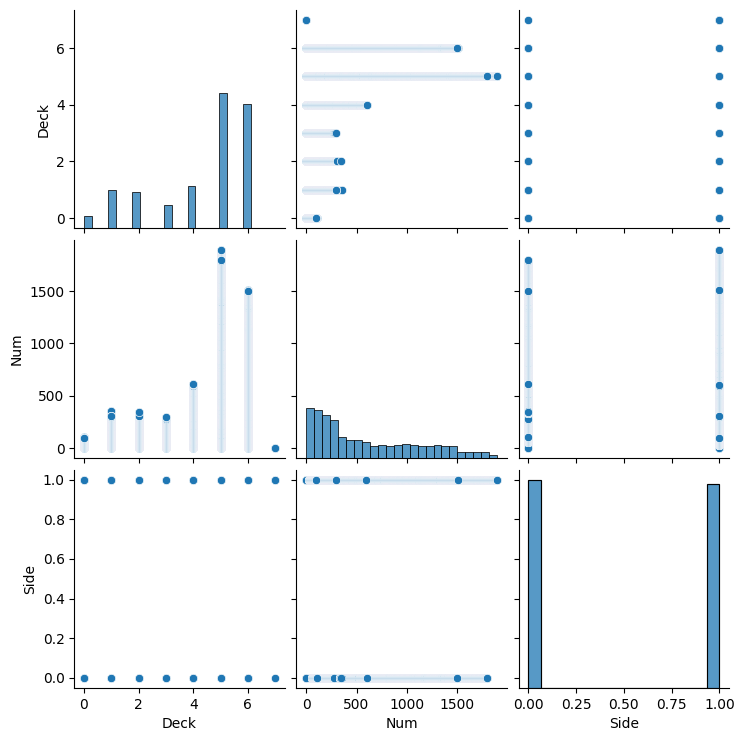

In [38]:
#plot all the features of the cabin_dict
sns.pairplot(data=pd.DataFrame.from_dict(cabin_dict))

Text(0, 0.5, 'Cabin deck')

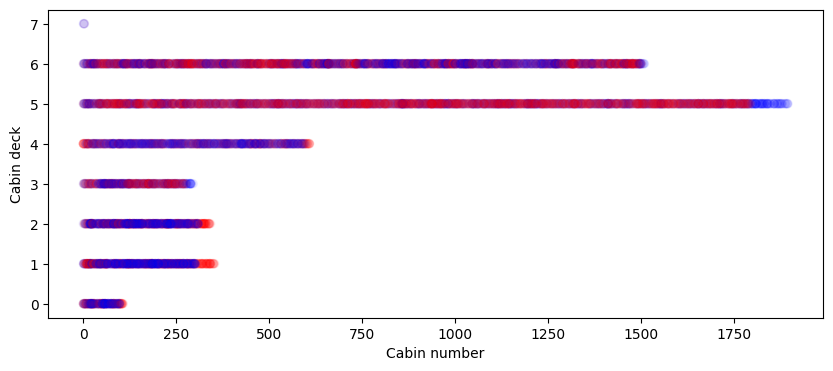

In [30]:
#plot 2D scatter
plt.figure(figsize = (10,4))
plt.scatter(cabin_dict['Num'], cabin_dict['Deck'],c = color, alpha=0.05)
plt.xlabel('Cabin number')
plt.ylabel('Cabin deck')


* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.

<Axes: xlabel='HomePlanet', ylabel='count'>

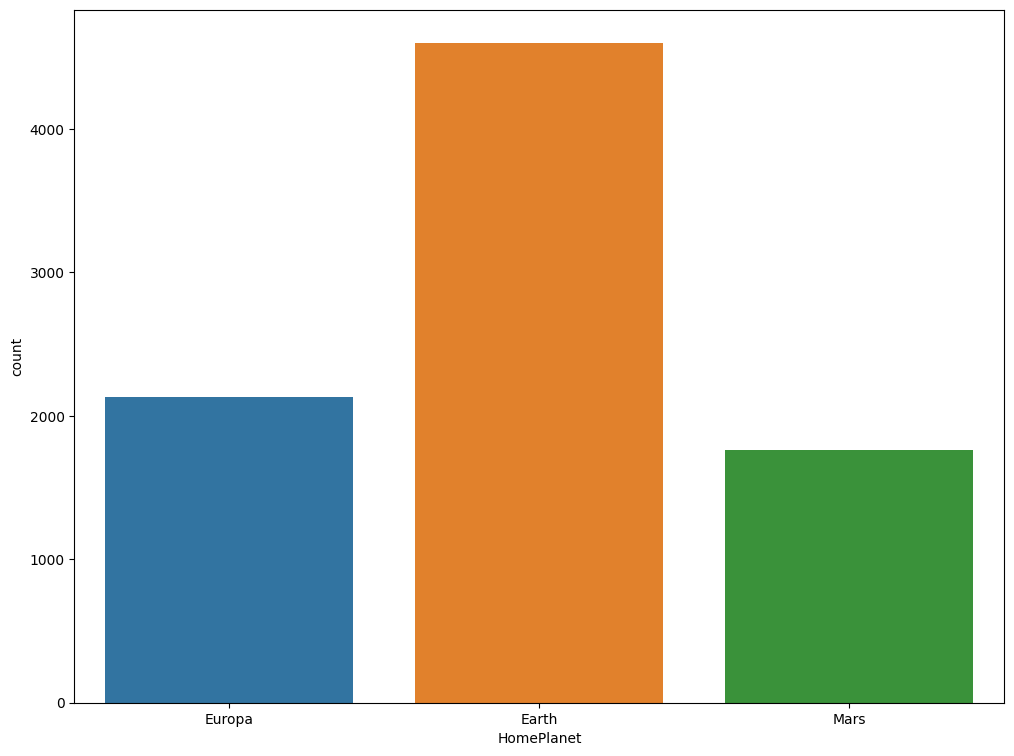

In [32]:
fig=plt.figure(figsize=(12,9))
sns.countplot(data=data, x='HomePlanet')


 * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<Axes: xlabel='CryoSleep', ylabel='count'>

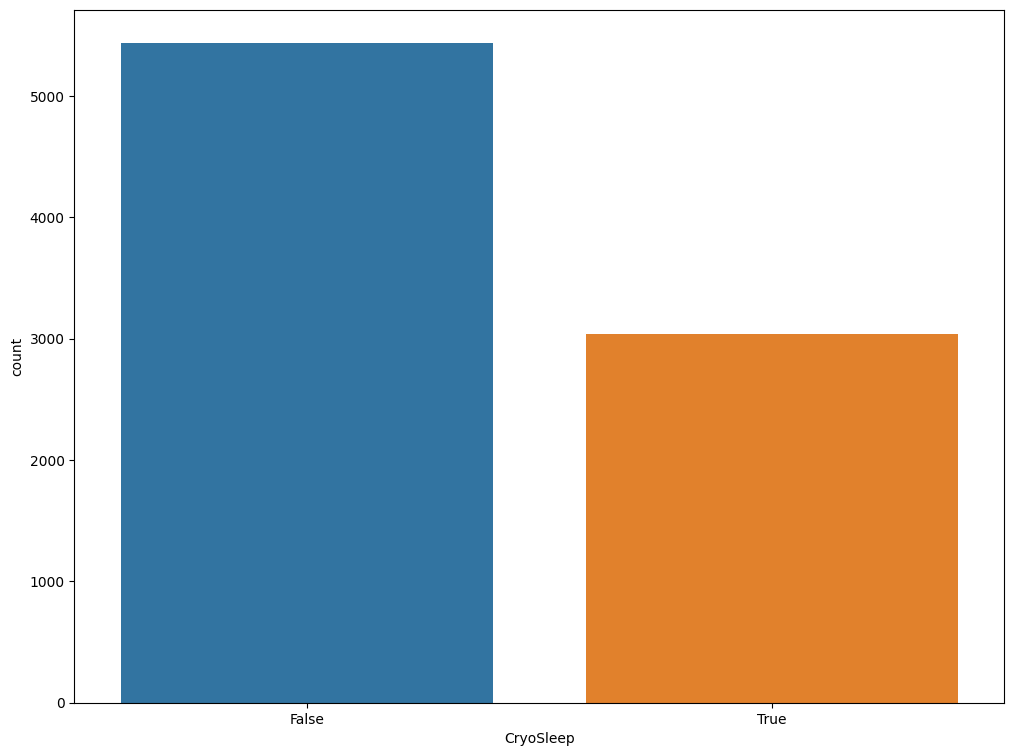

In [33]:
fig=plt.figure(figsize=(12,9))

sns.countplot(data=data, x='CryoSleep')


* **Destination** - The planet the passenger will be debarking to.

<Axes: xlabel='Destination', ylabel='count'>

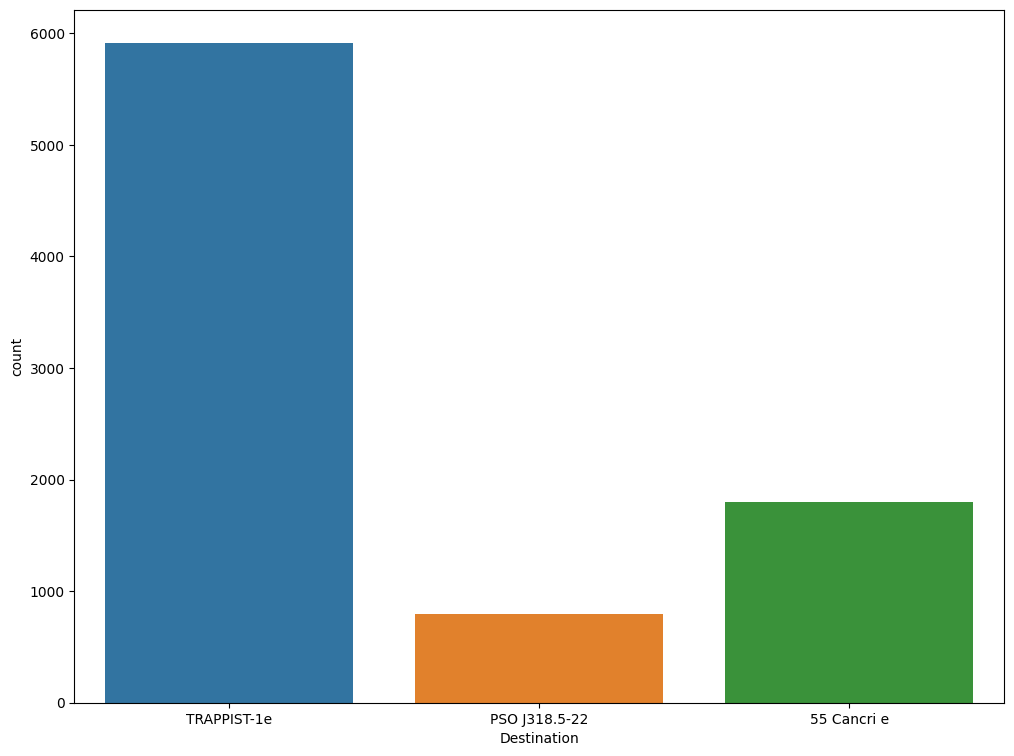

In [34]:
fig=plt.figure(figsize=(12,9))

sns.countplot(data=data, x='Destination')


 * **VIP** - Whether the passenger has paid for special VIP service during the voyage.

<Axes: xlabel='VIP', ylabel='count'>

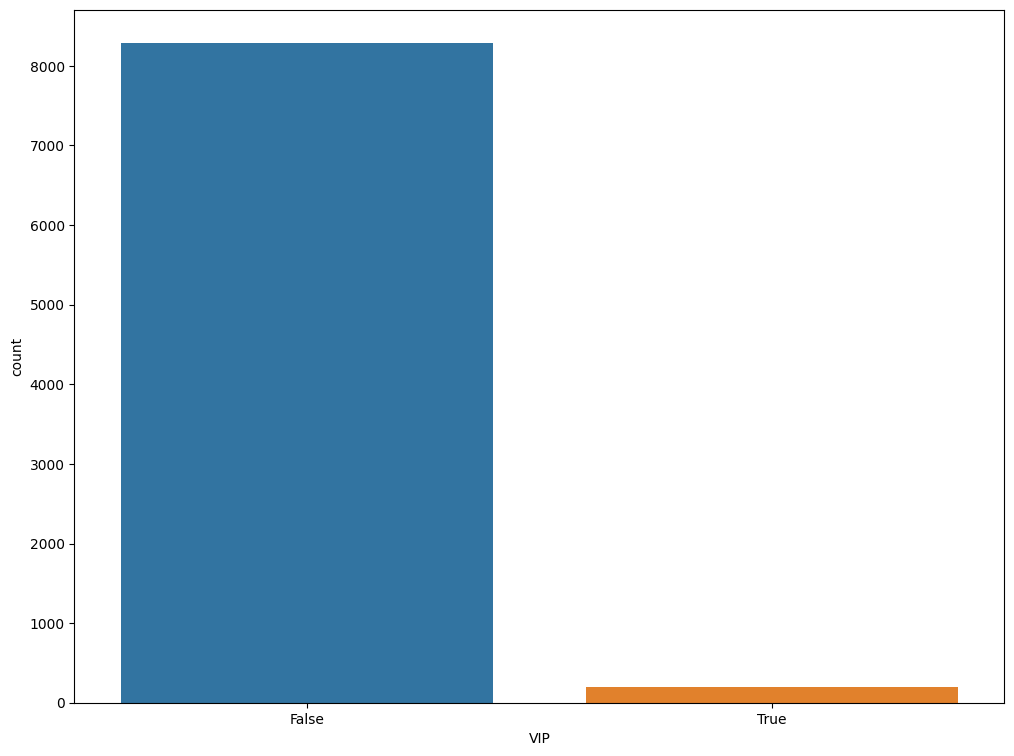

In [35]:
fig=plt.figure(figsize=(12,9))

sns.countplot(data=data, x='VIP')


# Missing Values

In [39]:
# Columns with missing values
na_cols=data.columns[data.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(data),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


WE cannot seimply delete the missing values because we will lose a lot of data.

In [41]:
data[na_cols].isna()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,False,False,False,False,False,False,False,False,False,False
8689,False,False,False,False,False,False,False,False,False,False,False,False
8690,False,False,False,False,False,False,False,False,False,False,False,False
8691,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

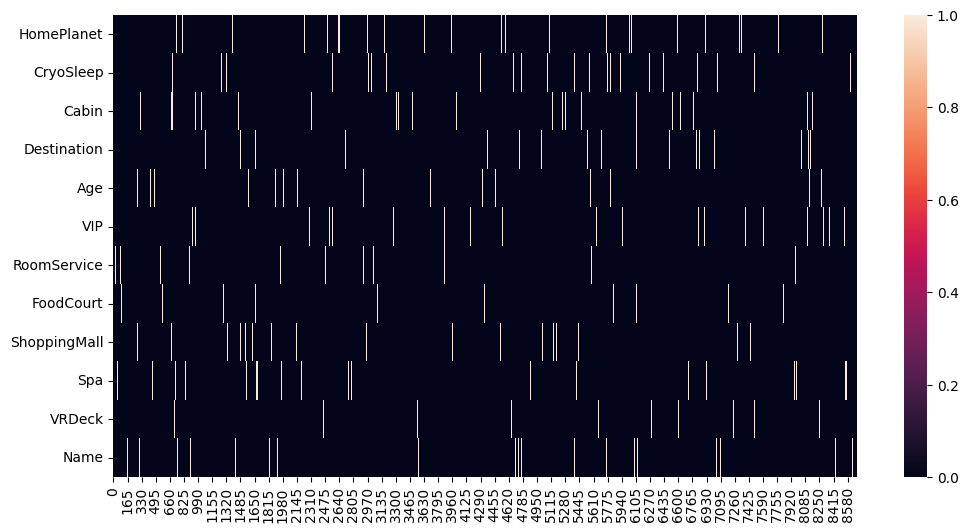

In [45]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(data[na_cols].isna().T)
